## New Feature #1 : Network Analysis 

Goal is to analyze the network structure of connections on personal LinkedIn account to identify key influencers or clusters of connections.

In [108]:
# import needed packages
import pandas
import networkx
import matplotlib.pyplot
import csv
import random

In [109]:
# import personal CSV file for LinkedIn connections here
# import CSV with data from LinkedIn about connections
csv_file_path = "NetworkConnections.csv"

# verify what delimiter is used in the csv using first line of file
with open("NetworkConnections.csv", "r", newline="") as file:
    first_line = file.readline().strip()
    dialect = csv.Sniffer().sniff(first_line)
    print("Detected delimiter:", dialect.delimiter)
    
# show first few rows of data to verify CSV was imported correctly
df = pandas.read_csv(csv_file_path, delimiter=",")
print(df.head())

Detected delimiter: ,
       First Name  Last Name  \
0        Federica  Fragapane   
1          Santra        Roy   
2           Amber     Wutich   
3  Kadison Nicole     Willis   
4            Adam      Marey   

                                                 URL Email Address  \
0  https://www.linkedin.com/in/federica-fragapane...           NaN   
1    https://www.linkedin.com/in/santra-elizebethroy           NaN   
2  https://www.linkedin.com/in/amber-wutich-38210b62           NaN   
3         https://www.linkedin.com/in/kadison-willis           NaN   
4             https://www.linkedin.com/in/adam-marey           NaN   

                             Company                      Position  \
0                          Freelance          Information Designer   
1       Regalix - | Client -Google |     Senior Project Consultant   
2           Arizona State University                     Professor   
3  Executive Office of the President  Environmental Justice Intern   
4             

In [110]:
def create_graph(csv_file_path):
    
    # read the CSV file into a DataFrame
    df2 = pandas.read_csv(csv_file_path)

    # create graph structure
    G = networkx.Graph()

    # add nodes and edges to the graph
    for index, row in df2.iterrows():
        # check for missing values aka blank cells in data frame
        if not pandas.isna(row['First Name']) and not pandas.isna(row['Last Name']):
            # convert to string and concatenate
            source_node = str(row['First Name']) + ' ' + str(row['Last Name'])
            G.add_node(source_node, 
                       url=row['URL'],
                       email=row['Email Address'],
                       company=row['Company'],
                       position=row['Position'])

            # add edges (connections)
            for index2, row2 in df2.iterrows():
                if index != index2 and not pandas.isna(row2['First Name']) and not pandas.isna(row2['Last Name']):
                    target_node = str(row2['First Name']) + ' ' + str(row2['Last Name'])
                    G.add_edge(source_node, 
                               target_node, 
                               connected_on=row['Connected On'])
    return G

In [111]:
G = create_graph(csv_file_path)

# analyze the network structure by providing network stats
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Average degree:", sum(dict(G.degree()).values()) / G.number_of_nodes())

Number of nodes: 269
Number of edges: 36047
Average degree: 268.0074349442379


/Users/aliciafritz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/aliciafritz/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 127759 (\N{EARTH GLOBE ASIA-AUSTRALIA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


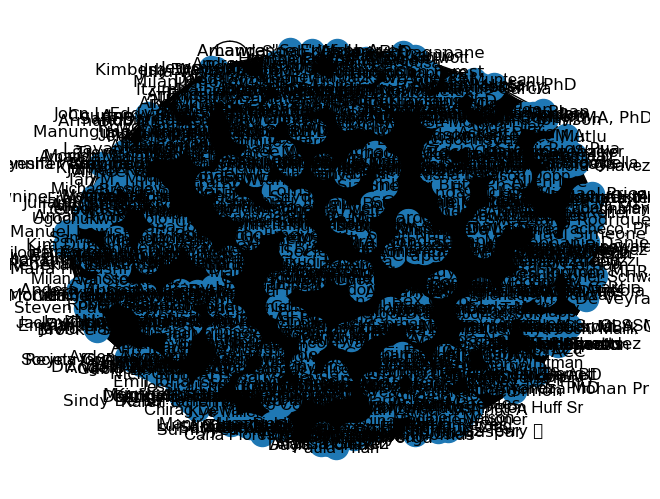

In [112]:
# visualize the network
networkx.draw(G, with_labels=True)
# error with font used, changing to arial
networkx.draw(G, with_labels=True, font_family="Arial")
matplotlib.pyplot.show()